In [1]:
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn import *
from sklearn.model_selection import train_test_split
import numpy as np

data = pd.read_csv('data/selected_features.csv')
data.head()
print(data.columns)
data = data.drop('price actual ewm', axis=1)
X_train, X_test, y_train, y_test = train_test_split(data.drop('price actual', axis=1), data['price actual'], test_size=0.2, random_state=42)

Index(['generation fossil hard coal', 'price actual',
       'generation hydro pumped storage consumption',
       'generation fossil hard coal ewm', 'price actual ewm',
       'generation hydro pumped storage consumption ewm',
       'generation other renewable', 'generation other ewm',
       'generation other renewable ewm', 'generation fossil oil ewm'],
      dtype='object')


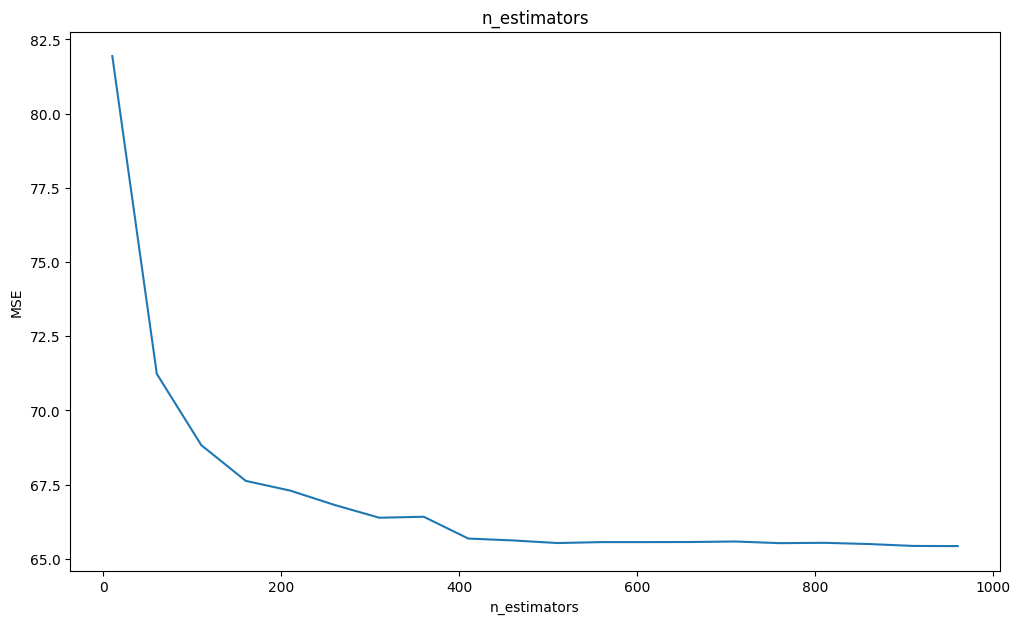

In [2]:
#Grid Search - Hyperparameter Tuning
x = np.arange(10, 1000, 50)
y = np.array([])

for i in range(10, 1000, 50):
    reg = xgb.XGBRegressor(n_estimators=i)
    reg.fit(X_train, y_train, verbose = False)
    pred = reg.predict(X_test)
    mse = mean_squared_error(y_test, pred)
    y = np.append(y, mse)

plt.figure(figsize=(12, 7))
plt.title("n_estimators")
plt.xlabel("n_estimators")
plt.ylabel("MSE")
plt.plot(x,y)
plt.show()

In [3]:
reg = xgb.XGBRegressor(n_estimators=600)
reg.fit(X_train, y_train, verbose = False)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=600, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

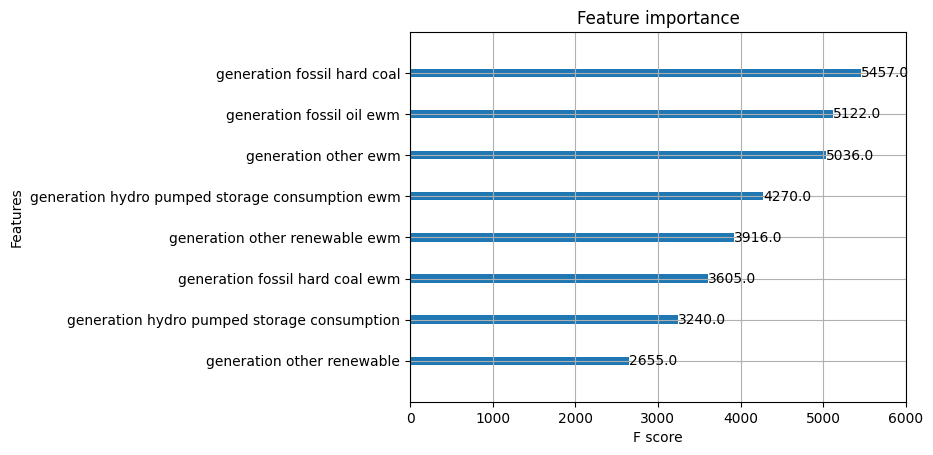

In [4]:
xgb.plot_importance(reg)

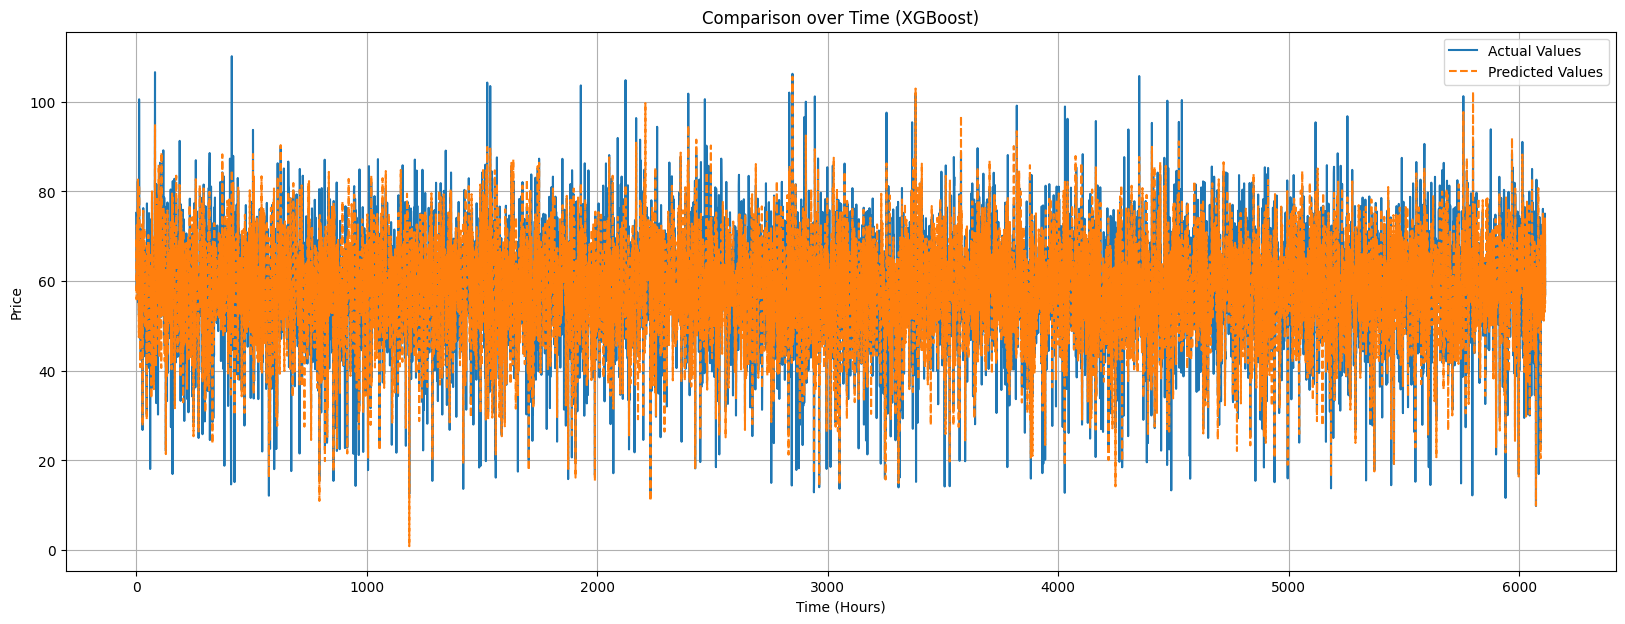

In [5]:
y_pred = reg.predict(X_test)

plt.figure(figsize=(20, 7))
plt.plot(y_test.reset_index(drop=True), label='Actual Values')
plt.plot(y_pred, label='Predicted Values', linestyle='dashed')
plt.xlabel('Time (Hours)')
plt.ylabel('Price')
plt.title('Comparison over Time (XGBoost)')
plt.legend()
plt.grid(True)
plt.show()

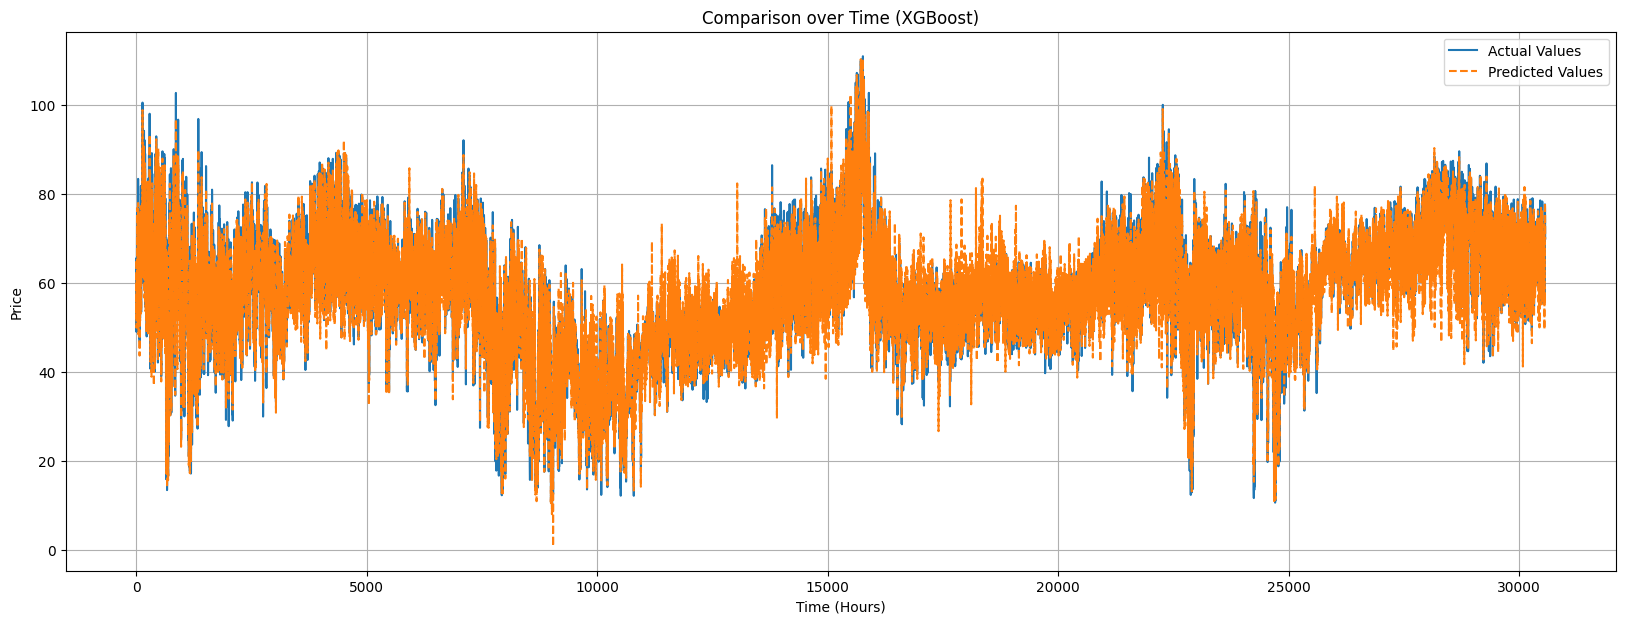

In [6]:
#Plot the xgb prediction against the total data
y_pred_total = reg.predict(data.drop('price actual', axis=1))

plt.figure(figsize=(20, 7))
plt.plot(data['price actual'], label='Actual Values')
plt.plot(y_pred_total, label='Predicted Values', linestyle='dashed')
plt.xlabel('Time (Hours)')
plt.ylabel('Price')
plt.title('Comparison over Time (XGBoost)')
plt.legend()
plt.grid(True)
plt.show()

In [7]:
# Calculating and printing the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Save the prediction data to csv
xgb = pd.DataFrame(y_pred)
xgb.to_csv('data/xgb.csv', index=False, header=False)

Mean Squared Error (MSE): 65.56663821582116
